In [1]:
from numpy import *
from matplotlib.pyplot import *

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute


P= []
fidelity1=[]
for p in range(1,6):
    count=0
    P.append(0.1*p)
    for q1 in range(1,11):
        for q2 in range(1,11):
            cr=ClassicalRegister(2)
            qr=QuantumRegister(2)
            qc= QuantumCircuit(qr,cr)
            qc.h(0)
            qc.cx(0,1)
            qc.barrier()
            if q1<=p:
                qc.x(0)
            if q2<= p:
                qc.x(1)
            qc.barrier()
            qc.cx(0,1)
            qc.h(0)
            qc.barrier()
            qc.measure(qr,cr)
            
            sim = Aer.get_backend('qasm_simulator') 
            result= execute(qc, backend=sim, shots=128).result().get_counts()
            try:
                count= count+result['00']
            except KeyError:
                pass
    fidelity1.append(count/12800)


Text(0.5, 1.0, 'Fidelity in bit flip channel')

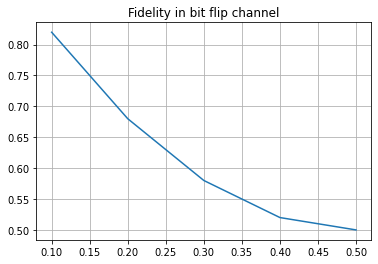

In [3]:
plot(P,fidelity1)
grid()
title("Fidelity in bit flip channel")

Text(0.5, 1.0, 'Fidelity of entangled state in bit flip channel')

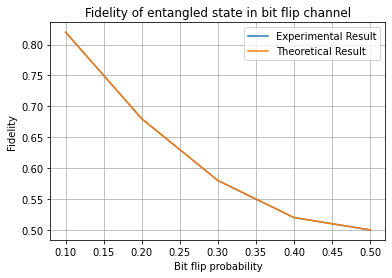

In [4]:
P= linspace(0.1,0.5,5)
fidelity_1= P*P+(1-P)*(1-P)
plot(P,fidelity1, label="Experimental Result")
plot(P,fidelity_1, label="Theoretical Result")
legend()
grid()
xlabel("Bit flip probability")
ylabel("Fidelity")
title("Fidelity of entangled state in bit flip channel")

In [5]:
cr= ClassicalRegister(2,"bell_basis_measurement")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(2, 'logical_qubit_alice')
lq2= QuantumRegister(2,'logical_qubit_bob')
#ancilla1= QuantumRegister(2, 'anicilla_qubit_alice')
#ancilla2= QuantumRegister(2, 'anicilla_qubit_bob')
#repetation_code_qc= QuantumCircuit(alice_qubit,lq1,ancilla1,bob_qubit,lq2,ancilla2,cr)

repetation_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)

repetation_code_qc.h(alice_qubit[0])
repetation_code_qc.cx(alice_qubit[0],bob_qubit[0])
repetation_code_qc.barrier()
repetation_code_qc.cx(alice_qubit[0],lq1[0])
repetation_code_qc.cx(alice_qubit[0],lq1[1])
repetation_code_qc.cx(bob_qubit[0],lq2[0])
repetation_code_qc.cx(bob_qubit[0],lq2[1])
repetation_code_qc.barrier()


In [6]:
repetation_code_qc.x(0)
repetation_code_qc.x(4)

In [7]:
repetation_code_qc.barrier()
#repetation_code_qc.cx(lq1[1],ancilla1[0])
#repetation_code_qc.cx(lq1[0],ancilla1[0])
#repetation_code_qc.cx(lq1[1],ancilla1[1])
#repetation_code_qc.cx(alice_qubit[0],ancilla1[1])
#repetation_code_qc.cx(lq2[1],ancilla2[0])
#repetation_code_qc.cx(lq2[0],ancilla2[0])
#repetation_code_qc.cx(lq2[1],ancilla2[1])
#repetation_code_qc.cx(bob_qubit[0],ancilla2[1])
                            
#repetation_code_qc.barrier()
#repetation_code_qc.cx(ancilla1[1],alice_qubit[0])
#repetation_code_qc.ccx(ancilla1[0],ancilla1[1],alice_qubit[0])
#repetation_code_qc.cx(ancilla1[0],lq1[0])
#repetation_code_qc.ccx(ancilla1[0],ancilla1[1],lq1[0])
#repetation_code_qc.ccx(ancilla1[0],ancilla1[1],lq1[1])
                            
#repetation_code_qc.cx(ancilla2[1],bob_qubit[0])
#repetation_code_qc.ccx(ancilla2[0],ancilla2[1],bob_qubit[0])
#repetation_code_qc.cx(ancilla2[0],lq2[0])
#repetation_code_qc.ccx(ancilla2[0],ancilla2[1],lq2[0])
#repetation_code_qc.ccx(ancilla2[0],ancilla2[1],lq2[1])

#
repetation_code_qc.cx(alice_qubit[0], lq1[0])
repetation_code_qc.cx(alice_qubit[0], lq1[1])
repetation_code_qc.ccx(lq1[0], lq1[1], alice_qubit[0])
                            
repetation_code_qc.cx(bob_qubit[0], lq2[0])
repetation_code_qc.cx(bob_qubit[0], lq2[1])
repetation_code_qc.ccx(lq2[0], lq2[1], bob_qubit[0])
#

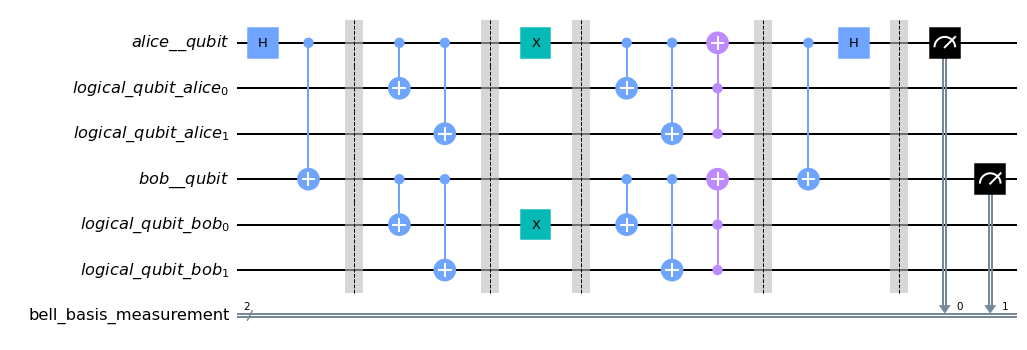

In [8]:
repetation_code_qc.barrier()
repetation_code_qc.cx(alice_qubit[0],bob_qubit[0])
repetation_code_qc.h(alice_qubit[0])
repetation_code_qc.barrier()
repetation_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
repetation_code_qc.draw()

In [9]:
sim = Aer.get_backend('qasm_simulator') 
result= execute(repetation_code_qc, backend=sim).result().get_counts()
print(result)

{'00': 1024}


REPETATION CODE

In [10]:
res=[]
for q1 in range(2):
        for q2 in range(2):
            for q3 in range(2):
                for q4 in range(2):
                    for q5 in range(2):
                        for q6 in range(2):
                            a=["I","I","I","I","I","I"]
                            cr= ClassicalRegister(2,"bell_basis_measurement")
                            alice_qubit= QuantumRegister(1, 'alice__qubit')
                            bob_qubit= QuantumRegister(1, 'bob__qubit')
                            lq1= QuantumRegister(2, 'logical_qubit_alice')
                            lq2= QuantumRegister(2,'logical_qubit_bob')
                            #ancilla1= QuantumRegister(2, 'anicilla_qubit_alice')
                            #ancilla2= QuantumRegister(2, 'anicilla_qubit_bob')
                            #repetation_code_qc= QuantumCircuit(alice_qubit,lq1,ancilla1,bob_qubit,lq2,ancilla2,cr)
                            #
                            repetation_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)
                            #
                            repetation_code_qc.h(alice_qubit[0])
                            repetation_code_qc.cx(alice_qubit[0],bob_qubit[0])
                            repetation_code_qc.barrier()
                            repetation_code_qc.cx(alice_qubit[0],lq1[0])
                            repetation_code_qc.cx(alice_qubit[0],lq1[1])
                            repetation_code_qc.cx(bob_qubit[0],lq2[0])
                            repetation_code_qc.cx(bob_qubit[0],lq2[1])
                            repetation_code_qc.barrier()
                            if q1:
                                repetation_code_qc.x(alice_qubit[0])
                                a[0]="X"
                            if q2:
                                repetation_code_qc.x(lq1[0])
                                a[1]="X"
                            if q3:
                                repetation_code_qc.x(lq1[1])
                                a[2]="X"
                            if q4:
                                repetation_code_qc.x(bob_qubit[0])
                                a[3]="X"
                            if q5:
                                repetation_code_qc.x(lq2[0])
                                a[4]="X"
                            if q6:
                                repetation_code_qc.x(lq2[1])
                                a[5]="X"
                                
                            repetation_code_qc.barrier()
                            #repetation_code_qc.cx(lq1[1],ancilla1[0])
                            #repetation_code_qc.cx(lq1[0],ancilla1[0])
                            #repetation_code_qc.cx(lq1[1],ancilla1[1])
                            #repetation_code_qc.cx(alice_qubit[0],ancilla1[1])
                            #repetation_code_qc.cx(lq2[1],ancilla2[0])
                            #repetation_code_qc.cx(lq2[0],ancilla2[0])
                            #repetation_code_qc.cx(lq2[1],ancilla2[1])
                            #repetation_code_qc.cx(bob_qubit[0],ancilla2[1])
                            
                            
                            #repetation_code_qc.barrier()
                            #repetation_code_qc.cx(ancilla1[1],alice_qubit[0])
                            #repetation_code_qc.ccx(ancilla1[0],ancilla1[1],alice_qubit[0])
                            #repetation_code_qc.cx(ancilla1[0],lq1[0])
                            #repetation_code_qc.ccx(ancilla1[0],ancilla1[1],lq1[0])
                            #repetation_code_qc.ccx(ancilla1[0],ancilla1[1],lq1[1])
                            
                            #repetation_code_qc.cx(ancilla2[1],bob_qubit[0])
                            #repetation_code_qc.ccx(ancilla2[0],ancilla2[1],bob_qubit[0])
                            #repetation_code_qc.cx(ancilla2[0],lq2[0])
                            #repetation_code_qc.ccx(ancilla2[0],ancilla2[1],lq2[0])
                            #repetation_code_qc.ccx(ancilla2[0],ancilla2[1],lq2[1])
                            
                            #
                            repetation_code_qc.cx(alice_qubit[0], lq1[0])
                            repetation_code_qc.cx(alice_qubit[0], lq1[1])
                            repetation_code_qc.ccx(lq1[0], lq1[1], alice_qubit[0])
                            
                            repetation_code_qc.cx(bob_qubit[0], lq2[0])
                            repetation_code_qc.cx(bob_qubit[0], lq2[1])
                            repetation_code_qc.ccx(lq2[0], lq2[1], bob_qubit[0])
                            #
                            
                            repetation_code_qc.barrier()
                            repetation_code_qc.cx(alice_qubit[0],bob_qubit[0])
                            repetation_code_qc.h(alice_qubit[0])
                            repetation_code_qc.barrier()
                            repetation_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
                            sim = Aer.get_backend('qasm_simulator') 
                            result= execute(repetation_code_qc, backend=sim, shots=64).result().get_counts()
                            a.append(result)
                            if result=={'00': 64}:
                                a.append("Corrected")
                            else:
                                a.append("Not corrected")
                            res.append(a)

In [11]:
for i in res:
    print(i)

['I', 'I', 'I', 'I', 'I', 'I', {'00': 64}, 'Corrected']
['I', 'I', 'I', 'I', 'I', 'X', {'00': 64}, 'Corrected']
['I', 'I', 'I', 'I', 'X', 'I', {'00': 64}, 'Corrected']
['I', 'I', 'I', 'I', 'X', 'X', {'10': 64}, 'Not corrected']
['I', 'I', 'I', 'X', 'I', 'I', {'00': 64}, 'Corrected']
['I', 'I', 'I', 'X', 'I', 'X', {'10': 64}, 'Not corrected']
['I', 'I', 'I', 'X', 'X', 'I', {'10': 64}, 'Not corrected']
['I', 'I', 'I', 'X', 'X', 'X', {'10': 64}, 'Not corrected']
['I', 'I', 'X', 'I', 'I', 'I', {'00': 64}, 'Corrected']
['I', 'I', 'X', 'I', 'I', 'X', {'00': 64}, 'Corrected']
['I', 'I', 'X', 'I', 'X', 'I', {'00': 64}, 'Corrected']
['I', 'I', 'X', 'I', 'X', 'X', {'10': 64}, 'Not corrected']
['I', 'I', 'X', 'X', 'I', 'I', {'00': 64}, 'Corrected']
['I', 'I', 'X', 'X', 'I', 'X', {'10': 64}, 'Not corrected']
['I', 'I', 'X', 'X', 'X', 'I', {'10': 64}, 'Not corrected']
['I', 'I', 'X', 'X', 'X', 'X', {'10': 64}, 'Not corrected']
['I', 'X', 'I', 'I', 'I', 'I', {'00': 64}, 'Corrected']
['I', 'X', 'I', 

In [12]:
count=0
corrected = []
for c in res:
    if c[7]=="Corrected":
        count=count+1
        corrected.append(c[:6])
print(count)        

32


In [13]:
for i in corrected:
    print(i)

['I', 'I', 'I', 'I', 'I', 'I']
['I', 'I', 'I', 'I', 'I', 'X']
['I', 'I', 'I', 'I', 'X', 'I']
['I', 'I', 'I', 'X', 'I', 'I']
['I', 'I', 'X', 'I', 'I', 'I']
['I', 'I', 'X', 'I', 'I', 'X']
['I', 'I', 'X', 'I', 'X', 'I']
['I', 'I', 'X', 'X', 'I', 'I']
['I', 'X', 'I', 'I', 'I', 'I']
['I', 'X', 'I', 'I', 'I', 'X']
['I', 'X', 'I', 'I', 'X', 'I']
['I', 'X', 'I', 'X', 'I', 'I']
['I', 'X', 'X', 'I', 'X', 'X']
['I', 'X', 'X', 'X', 'I', 'X']
['I', 'X', 'X', 'X', 'X', 'I']
['I', 'X', 'X', 'X', 'X', 'X']
['X', 'I', 'I', 'I', 'I', 'I']
['X', 'I', 'I', 'I', 'I', 'X']
['X', 'I', 'I', 'I', 'X', 'I']
['X', 'I', 'I', 'X', 'I', 'I']
['X', 'I', 'X', 'I', 'X', 'X']
['X', 'I', 'X', 'X', 'I', 'X']
['X', 'I', 'X', 'X', 'X', 'I']
['X', 'I', 'X', 'X', 'X', 'X']
['X', 'X', 'I', 'I', 'X', 'X']
['X', 'X', 'I', 'X', 'I', 'X']
['X', 'X', 'I', 'X', 'X', 'I']
['X', 'X', 'I', 'X', 'X', 'X']
['X', 'X', 'X', 'I', 'X', 'X']
['X', 'X', 'X', 'X', 'I', 'X']
['X', 'X', 'X', 'X', 'X', 'I']
['X', 'X', 'X', 'X', 'X', 'X']


In [14]:
p=linspace(0,1,21)
fid1= (1-p)**2+p**2
fid2= (1-p)**6+p**6+6*p*((1-p)**5)+9*(p**2)*((1-p)**4)+9*(p**4)*((1-p)**2)+6*(p**5)*(1-p)

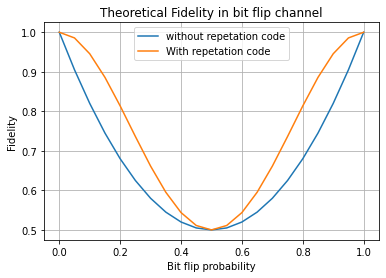

In [15]:
plot(p,fid1, label="without repetation code")
plot(p,fid2, label="With repetation code")
title("Theoretical Fidelity in bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()

In [16]:
Summary= {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
for i in corrected:
    count=0
    for x in i:
        if x=="X":
            count=count+1
    Summary[count]+=1

print(Summary)

{0: 1, 1: 6, 2: 9, 3: 0, 4: 9, 5: 6, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0}
